Coursera Google Advanced Data Analytics

Course 4 The Power of Statistics

Module 3 Sampling

Work with probability distributions in Python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [ ]:
education_districtwise = pd.read_csv("/content/education_districtwise.csv")

Check for missing values in the column and handle them

In [ ]:
education_districtwise['OVERALL_LI'].isnull().sum()

46

filling with dropping rows:

In [ ]:
education_districtwise = education_districtwise.dropna(subset=['OVERALL_LI'])

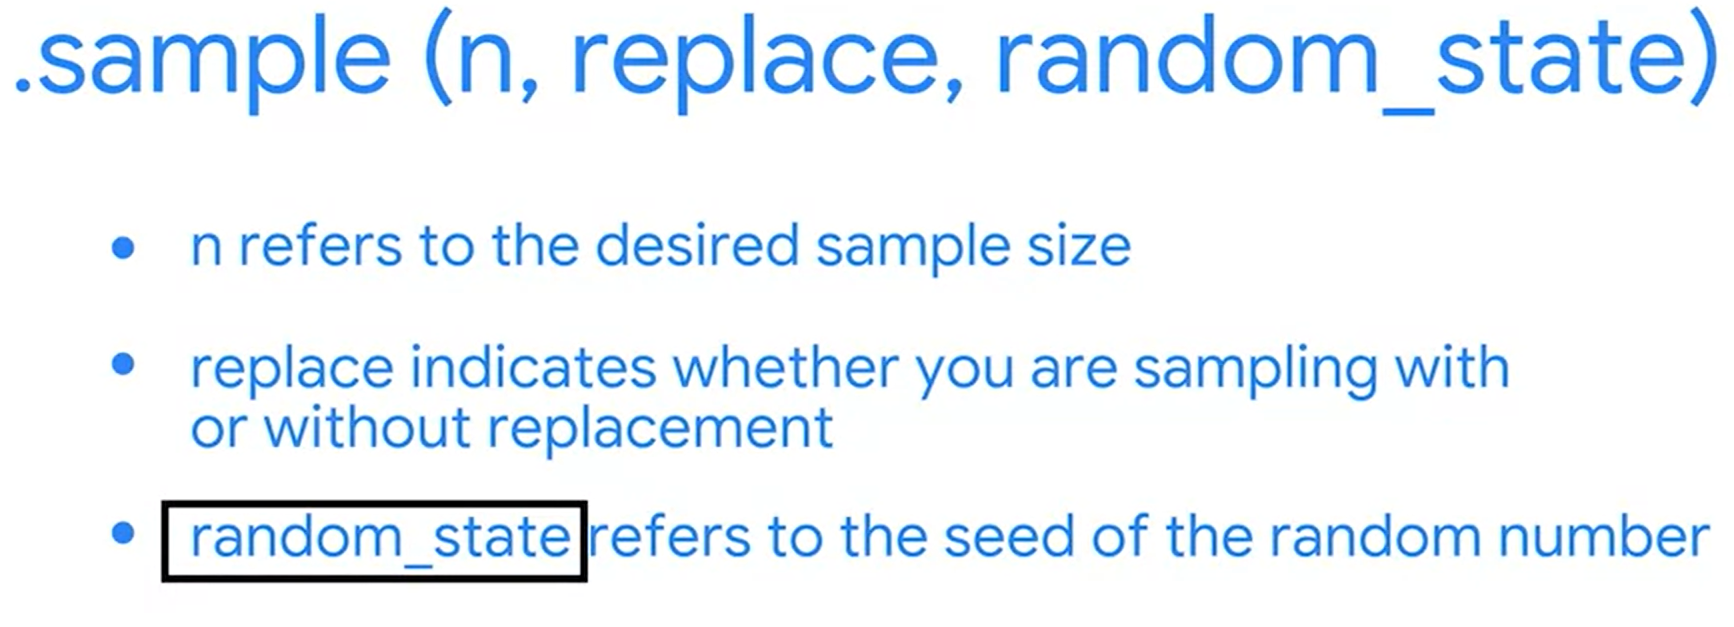

Image from Google Advanced Data Analytics

A random seed is a starting point for generating random numbers

In [ ]:
sampled_data = education_districtwise.sample(n=50, replace=True, random_state=31208)
sampled_data

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
661,DISTRICT528,STATE6,9,112,89,1863174.0,92.14
216,DISTRICT291,STATE28,14,1188,165,3273127.0,52.49
367,DISTRICT66,STATE23,12,1169,116,1042304.0,62.14
254,DISTRICT458,STATE3,3,157,19,82839.0,76.33
286,DISTRICT636,STATE35,3,187,44,514683.0,86.70
369,DISTRICT512,STATE23,6,589,30,717169.0,68.35
258,DISTRICT156,STATE3,6,80,9,35289.0,59.94
10,DISTRICT412,STATE1,11,187,95,476820.0,68.69
512,DISTRICT277,STATE9,10,558,179,2298934.0,84.31
144,DISTRICT133,STATE21,14,1672,136,3673849.0,69.61


The output shows 50 districts selected randomly from your data set. Each has a different literacy rate.

In [ ]:
estimate1 = sampled_data['OVERALL_LI'].mean()
estimate1

74.22359999999999

The sample mean for district literacy rate is about 74.22 percent.

In [ ]:
estimate2 = education_districtwise['OVERALL_LI'].sample(n=50, replace=True, random_state=56810).mean()
estimate2

74.2478

 For your second estimate, the sample mean for your district literacy rate is about 74.24 percent. Due to sampling variability, this sample mean is different from the sample mean of your previous estimate, 74.22 percent but they're really close.

 Recall that the central limit theorem tells you that when the sample size is large enough, the sample mean approaches a normal distribution and as you sample more observations from a population, the sample mean gets closer to the population mean. The larger your sample size, the more accurate your estimate of the population mean is likely to be.

In [ ]:
estimate_list = []
for i in range(10000):
  estimate_list.append(education_districtwise['OVERALL_LI'].sample(n=50, replace=True).mean())
estimate_df = pd.DataFrame(data={'estimate':estimate_list})

Take 10,000 random samples of 50 districts and compute the mean for each sample. According to the central limit theorem, the mean of your sampling distribution will be roughly equal to the population mean.

In [ ]:
mean_sample_means = estimate_df['estimate'].mean()
mean_sample_means

73.41526126000001

The mean of your sampling distribution is about 73.42 percent. This is essentially identical to the population mean of your complete dataset, which is about 73.4 percent.

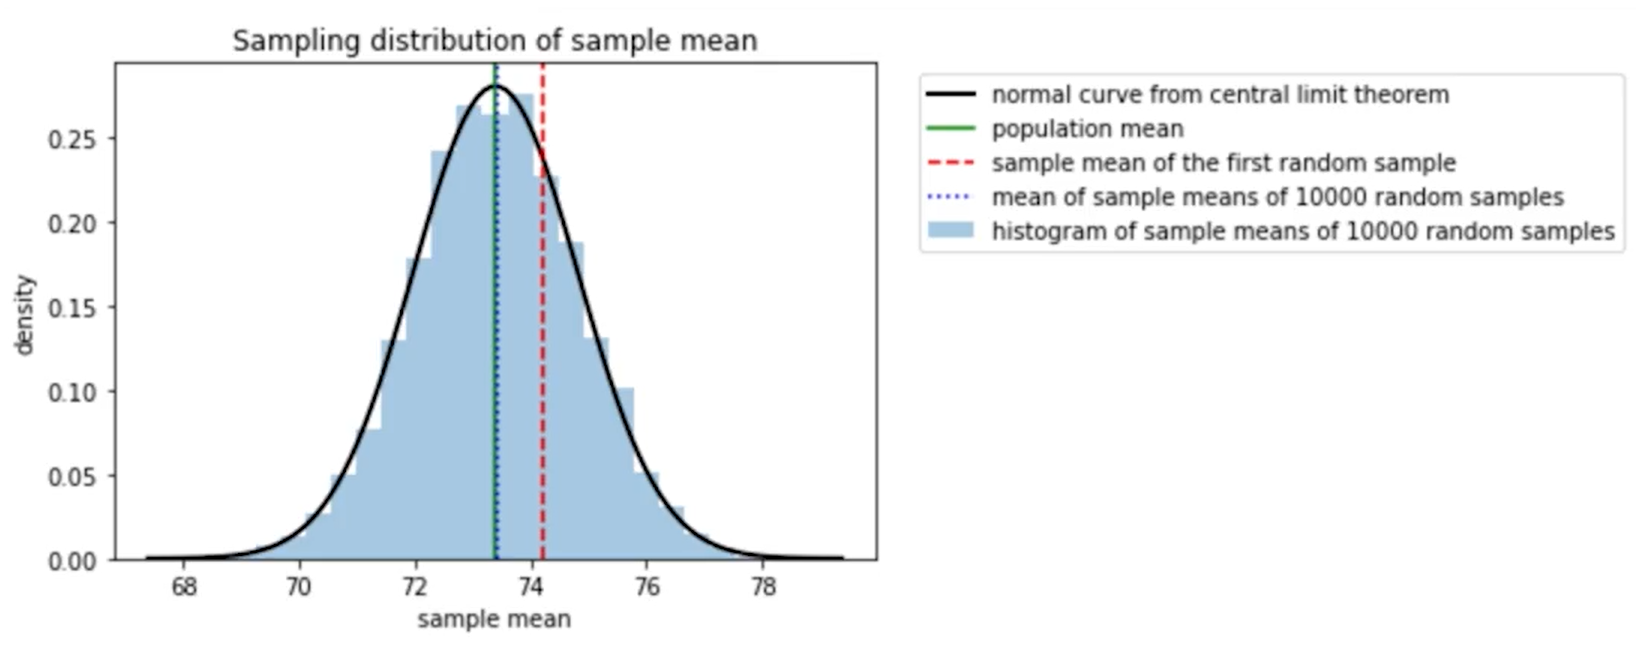

Image from Google Advanced Data Analytics

First, as the central limit theorem predicts, the histogram of the sampling distribution is well approximated by the normal distribution. The outline of the histogram closely follows the normal curve. Second, the mean of the sampling distribution, the blue dotted line, overlaps with the population mean, the green solid line. This shows that the two means are essentially equal to each other. Third, the sample mean of your first estimate of 50 districts, the red dashed line is farther away from the center. This is due to sampling variability.